In [1]:
# Import different packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data and display the first 5 rows

file_path = '../data/raw/data.csv'  
data = pd.read_csv(file_path)

data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
data.columns.to_list()[:5]

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin']

Since some column names have space at the beginning, makes it hard to work with them. We remove front and end white spaces in the column names.

In [5]:
# Strip the column names

column_names = data.columns.to_list()
# column_rename_dict = {}
for i, column in enumerate(column_names):
    column_names[i] = column.strip()

data.columns = column_names
data.columns.to_list()[:5]

['Bankrupt?',
 'ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Operating Gross Margin']

In [6]:
# Shape of the data

data.shape

(6819, 96)

Hence, there are 6819 rows and 96 columns.

In [7]:
# Basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [8]:
# Checking missing values

missing_values_count = data.isnull().sum().reset_index()
missing_values_count.columns = ['feature', 'missing_count']

missing_values_count[missing_values_count['missing_count'] > 0]

Empty DataFrame
Columns: [feature, missing_count]
Index: []

In [9]:
# Checking for duplicates

data.duplicated().sum()

0

There is no missing value or duplicated columns in the table.

In [10]:
# Checking if all features are numeric

data.select_dtypes(include=[int, float]).shape

(6819, 96)

Each feature is either integer or float.

In [11]:
# Find the name of integer columns

list(data.select_dtypes(include=[int]).columns)

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

In [12]:
# Count different values of integer columns

data['Bankrupt?'].value_counts(normalize=True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

Our target column is 'Bankrupt?', which is categorical with two classes. It is very unbalanced with minority class frequency 3.23%. 

In [13]:
data['Liability-Assets Flag'].value_counts()

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64

In [14]:
data['Net Income Flag'].value_counts()

Net Income Flag
1    6819
Name: count, dtype: int64

Hence, we have 93 float features, one binary categorical feature 'Liability-Assets Flag', one binary categorical target 'Bankrupt?', and one categorical feature 'Net Income Flag' with only one class. The column 'Net Income Flag' being constant is not informative and we immediately drop it.

In [15]:
# Dropping a constant column

data.drop(columns=['Net Income Flag'], inplace=True)

data.shape

(6819, 95)

In [16]:
# Statistical summary of the dataset

data.describe()

Bankrupt?  ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Liability-Assets Flag  Net Income to Total Assets  \
count            6819.000000                 6819.000000   
mean                0.001173                    0.807760   
std                 0.034234                    0.040332   
min                 0.000000                    0.000000   
25%                 0.000000                    

It seems that most features have values between 0 and 1, and the other columns' ranges are very different (like 1e+10). So, we will use standardization before modeling. We will use the robust scalar because we have a lot of outlier or extreme values according to bellow box plots. 

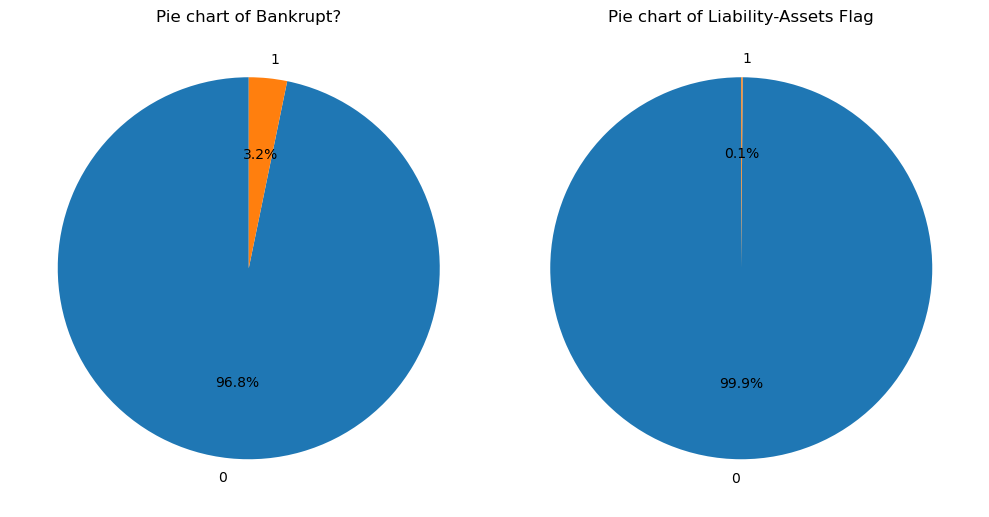

In [17]:
# Pie chart of the categorical features

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
categorical_features = data.select_dtypes(include=['int']).columns

for i, feature in enumerate(categorical_features):
    d = data[feature].value_counts()
    axes[i].pie(d, labels=d.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie chart of {feature}")

plt.tight_layout()
plt.show()

In [18]:
# Plot the histogram and box plot of float features

fig, axes = plt.subplots(93, 2, figsize=(15, 372))
numerical_features = data.select_dtypes(include=['float']).columns

for i, feature in enumerate(numerical_features):
    sns.histplot(data=data, y=feature, kde=True, bins=50, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {feature}')
    sns.boxplot(data=data, x='Bankrupt?', y=feature, ax=axes[i,1])
    axes[i,1].set_title(f'Box Plot of {feature} vs. Bankrupt?')

# Adjust layout
plt.tight_layout()
plt.show()



In [19]:
# Correlation matrix

correlation_matrix = data.corr()
correlation_matrix['Bankrupt?'].sort_values(ascending=False)  # Correlation with target variable

Bankrupt?                                                  1.000000
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
                                                             ...   
Net worth/Assets                                          -0.250161
ROA(C) before interest and depreciation before interest   -0.260807
ROA(B) before interest and depreciation after tax         -0.273051
ROA(A) before interest and % after tax                    -0.282941
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, Length: 95, dtype: float64

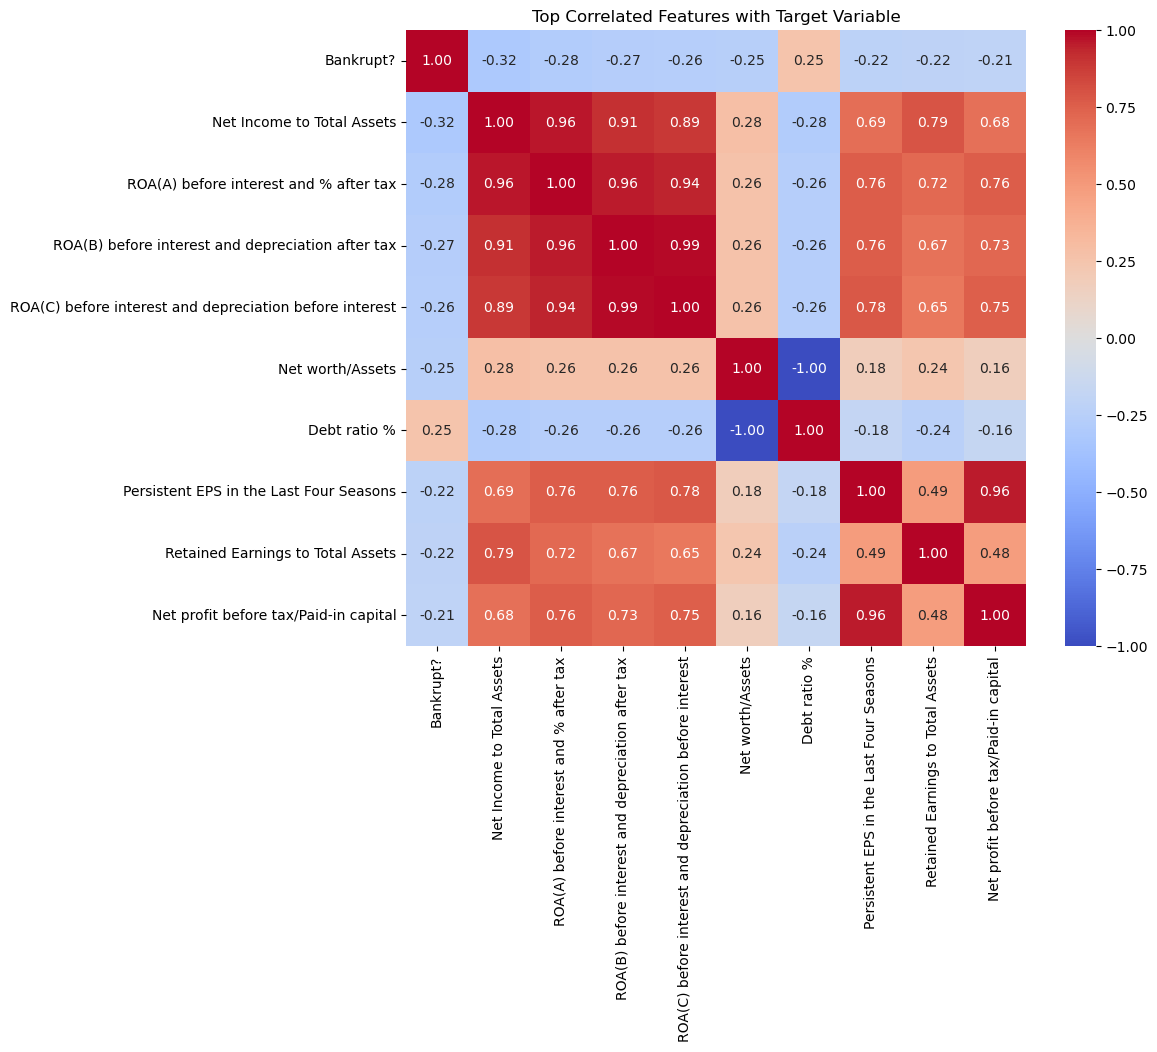

In [20]:
# Heatmap of top correlated features with the target variable

plt.figure(figsize=(10, 8))
top_corr_features = correlation_matrix['Bankrupt?'].abs().sort_values(ascending=False).head(10).index
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with Target Variable')
plt.show()
